In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st 
import hvplot.pandas

import glob
 
# Read/Merge Unemployment CSV files
unemployment_all = pd.concat([pd.read_csv("UnemploymentDC.csv"),
                               pd.read_csv("UnemploymentFL.csv"),
                               pd.read_csv("UnemploymentSD.csv"),
                               pd.read_csv("UnemploymentUS.csv"),
                               pd.read_csv("UnemploymentWV.csv")], ignore_index=True)
crime_states = pd.read_csv("crime_states.csv")

# unemployment_all

In [3]:
# Convert Month and Year into datetime format and into one column for plotting
unemployment_all['Date'] = pd.to_datetime(unemployment_all['Year'].astype(str) + '-' + 
                                          unemployment_all['Month'], format='%Y-%b')

unemployment_all



,State,Year,Month,Value,Date
0,DC,1979,Jan,7.6,1979-01-01
1,DC,1979,Feb,7.6,1979-02-01
2,DC,1979,Mar,7.4,1979-03-01
3,DC,1979,Apr,7.2,1979-04-01
4,DC,1979,May,7.0,1979-05-01
...,...,...,...,...,...
2635,WV,2022,Aug,4.1,2022-08-01
2636,WV,2022,Sep,4.1,2022-09-01
2637,WV,2022,Oct,4.1,2022-10-01
2638,WV,2022,Nov,4.1,2022-11-01


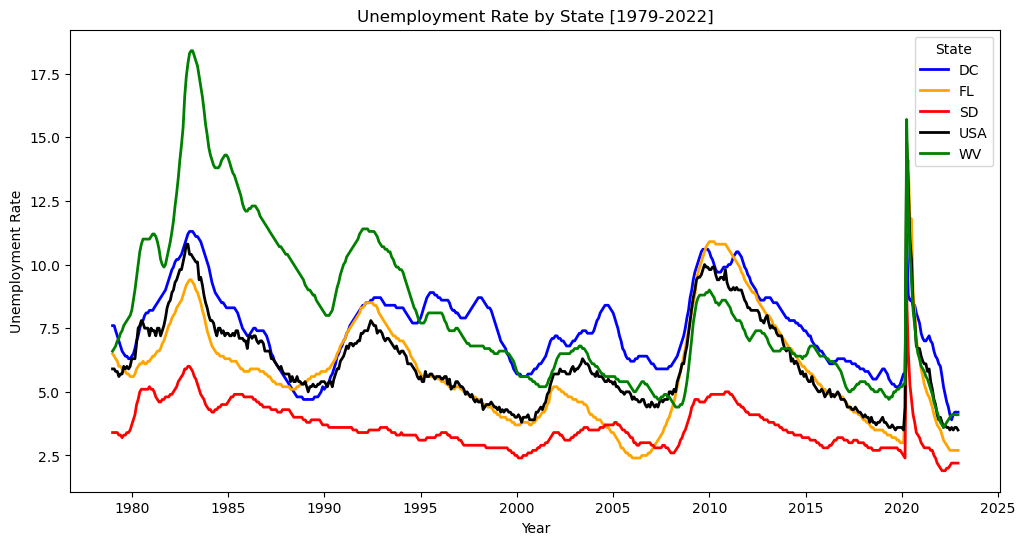

In [4]:
state_colors = {"DC":"blue","FL":"orange","WV":"green","SD":"red","USA":"black"}


plt.figure(figsize=(12,6))
for state, data in unemployment_all.groupby("State"):
    color= state_colors.get(state, "gray")
    plt.plot(data["Date"], data["Value"], label=state, linewidth=2, color=color)

plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate by State [1979-2022]")
plt.legend(title="State")

# plt.grid(True)
# plt.savefig("output_data/fig4.png")
plt.show()


In [5]:
# Dataset from Crimes.ipynb

crime_states

,year,state_abbr,population,violent_crime,homicide,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total_Crime,"Total Crime per 100,000",Crime per Capita
0,1979,DC,656000,10553,180,489.0,6920,2964,45877,13452,28819,3606,112860.0,17204.3,17.2
1,1979,FL,8860000,73881,1084,4576.0,22097,46124,607281,190884,378099,38298,1362324.0,15376.1,15.4
2,1979,SD,689000,1096,14,113.0,140,829,19297,4316,13782,1199,40786.0,5919.6,5.9
3,1979,WV,1878000,3156,128,291.0,825,1912,40513,11959,24755,3799,87338.0,4650.6,4.7
4,1980,DC,635233,12772,200,439.0,8897,3236,50896,16260,31068,3568,127336.0,20045.6,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2021,WV,1785526,5205,108,945.0,210,3942,24225,3839,18408,1978,58860.0,3296.5,3.3
172,2022,DC,671803,5457,197,279.0,2402,2579,23926,1352,18696,3878,58766.0,8747.5,8.7
173,2022,FL,22244823,57587,1113,6714.0,7477,42283,348403,38594,279116,30693,811980.0,3650.2,3.7
174,2022,SD,909824,3434,39,508.0,230,2657,15804,2393,11207,2204,38476.0,4228.9,4.2


In [18]:
# Dropped unnecessary columns from DF
crime_states.drop(columns=["population", "violent_crime", "homicide", "rape_revised",
                           "robbery", "aggravated_assault", "property_crime", "burglary",
                           "larceny", "motor_vehicle_theft", "Total_Crime", "Total Crime per 100,000"], inplace=True)
crime_states.rename(columns={"year": "Year"}, inplace=True)

crime_states


,Year,state_abbr,Crime per Capita
0,1979,DC,17.2
1,1979,FL,15.4
2,1979,SD,5.9
3,1979,WV,4.7
4,1980,DC,20.0
...,...,...,...
171,2021,WV,3.3
172,2022,DC,8.7
173,2022,FL,3.7
174,2022,SD,4.2


In [19]:
# Group the data by Year and State, and calculate the mean of the Value column
average_unemployment = unemployment_all.groupby(['Year', 'State'])['Value'].mean().reset_index()

# Display the resulting DataFrame
print(average_unemployment)


     Year State     Value
0    1979    DC  6.841667
1    1979    FL  5.991667
2    1979    SD  3.358333
3    1979   USA  5.850000
4    1979    WV  7.325000
..    ...   ...       ...
215  2022    DC  4.616667
216  2022    FL  2.900000
217  2022    SD  2.066667
218  2022   USA  3.633333
219  2022    WV  3.916667

[220 rows x 3 columns]


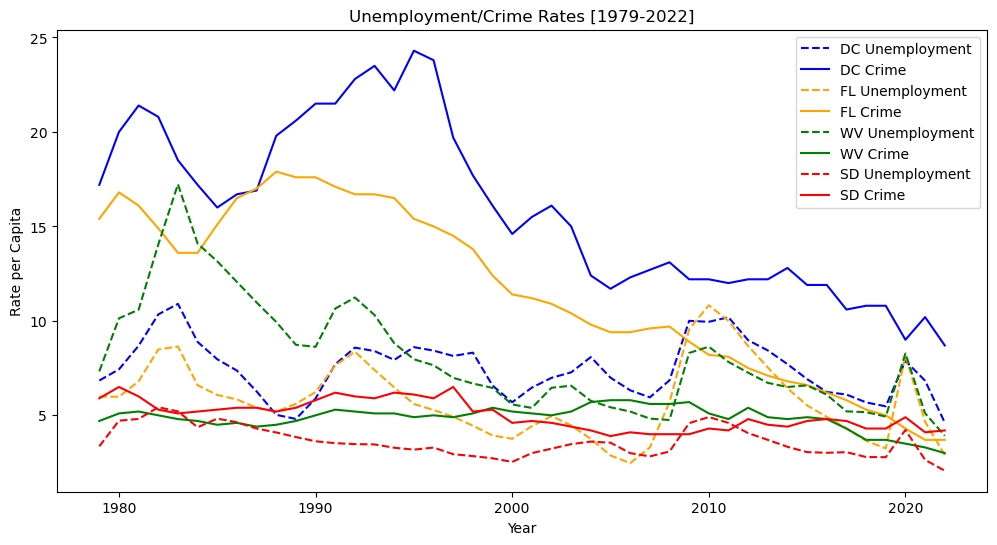

In [21]:

# Define state colors
state_colors = {"DC": "blue", "FL": "orange", "WV": "green", "SD": "red", "USA": "black"}

# Group data by year and state, and calculate the mean unemployment rate
average_unemployment = unemployment_all.groupby(["Year", "State"])["Value"].mean().unstack()

# Group data by year and state, and calculate the mean crime rate per capita
average_crime = crime_states.groupby(["Year", "state_abbr"])["Crime per Capita"].mean().unstack()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot average unemployment rate and crime rate for each state
for state in state_colors.keys():
    if state in average_unemployment.columns and state in average_crime.columns:
        plt.plot(average_unemployment.index, average_unemployment[state], label=f"{state} Unemployment", linestyle="--", color=state_colors[state])
        plt.plot(average_crime.index, average_crime[state], label=f"{state} Crime", linestyle="-", color=state_colors[state])

plt.xlabel("Year")
plt.ylabel("Rate per Capita")
plt.title("Unemployment/Crime Rates [1979-2022]")
plt.legend(loc="upper right")
# plt.grid(True)
# plt.savefig("output_data/fig5.png")
plt.show()


R Value: 0.22


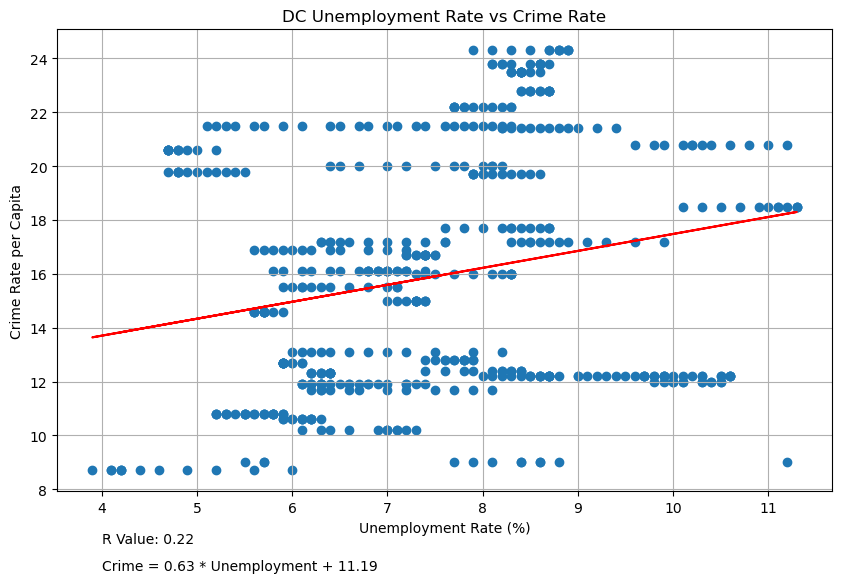

In [22]:
# Plot correlations DC

# Filter data for DC
dc_unemployment = unemployment_all[unemployment_all["State"] == "DC"]
dc_crime = crime_states[crime_states["state_abbr"] == "DC"]

# Merge the two datasets on the common column (e.g., year)
dc_data = pd.merge(dc_unemployment, dc_crime, on="Year")

# Calculate correlation coefficient
corr_coef = dc_data["Value"].corr(dc_data["Crime per Capita"])

# Linear model
slope, intercept, r_value, p_value, std_err = linregress(dc_data["Value"], dc_data["Crime per Capita"])
predicted_values = slope * dc_data["Value"] + intercept

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(dc_data["Value"], dc_data["Crime per Capita"])
plt.plot(dc_data["Value"], predicted_values, color="red", label="Linear Regression Line")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Crime Rate per Capita")
plt.title("DC Unemployment Rate vs Crime Rate")
plt.grid(True)


# Add correlation coefficient to plot
plt.text(4, 6, f'R Value: {corr_coef:.2f}', fontsize=10)
plt.text(4, 5, f'Crime = {slope:.2f} * Unemployment + {intercept:.2f}', fontsize=10)
print(f"R Value: {corr_coef:.2f}")
plt.savefig("output_data/fig6.png")
plt.show()
